출처

http://bigdata.dongguk.ac.kr/lectures/datascience/_book/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.html

계층적 군집분석

http://www.datamarket.kr/xe/index.php?mid=board_mXVL91&document_srl=9807&listStyle=viewer

https://todayisbetterthanyesterday.tistory.com/59

https://todayisbetterthanyesterday.tistory.com/61

비계층적 군집분석 

https://yganalyst.github.io/ml/ML_clustering/

## 군집분석

### 군집분석이란?

모집단 또는 범주에 대한 사전정보가 없는 경우 주어진 관측값들 사이의 거리 또는 유사성을 이용하여 전체를 몇 개의 집단으로 그룹화함으로써 각 집단의 성격을 파악하고 데이터에 대한 이해를 돕고자 하는 분석법

* 군집화의 기준: 동일한 군집에 속하는 레코드는 컬럼이 서로 비슷하고, 서로 다른 군집에 속한 레코드는 그렇지 않도록 구성

#### 계층적 군집분석

계층적 군집분석은 개체들을 가까운 집단부터 순차적이고 계층적으로 차근차근 묶어나가는 방식이다. 이러한 방식으로 군집이 형성되기에 유사한 개체들이 결합되는 dendogram을 통해서 시각화가 가능하고, 계층적 구조로 인해 사전에 군집의 개수를 정하지 않아도 수행이 가능하다. 

하지만, 군집을 형성하는데 있어서 Hierarchical clustering은 매 단계에서 지역적 최적해(local minimum)을 찾아가는 방법을 사용하기에 결과가 전역적 최적해(global minimum)이라고 볼 수 없다.
<br>

* Hierarchical clustering의 과정

  1. 모든 개체들 사이의 거리에 대한 유사도 행렬 계산 (거리 계산은 유클리드, 맨하튼, 민코우스키, 코사인 등으로 계산한다.)
![](distance.png)
  2. 거리가 인접한 관측치끼리 cluster 형성(관측치를 선택하는 방법은 최단연결법, 최장연결법, 평균연결법, 중심연결법, 와드연결법이 있다.)
![](%EC%97%B0%EA%B2%B0%EB%B2%951.png)
  1. 유사도 행렬 업데이트
    * 예를 들어 데이터 포인트 A,B,C,D,E가 있을 때 가장 가까운 데이터 포인트 2개가 A,B라고 하자. 이 경우에 가장 가까운 것을 판단하는 기준이 1.의 거리 계산이다.

    * 이후에 A,B가 서로 군집이 되고 AB,C,D,E 가 남는데, 다음으로 가까운 것이 AB와 C라면 이 때부터 최단연결법, 최장연결법을 이용해 군집을 생성하는 것이다.(최단 연결법을 예로 들면, AB에서 C와 가장 가까운 데이터 포인트 A와 C의 거리를 측정하는 것. 반대로 최장 연결법이라면 군집 AB에서 가장 C와 먼 B와 C의 거리를 측정하여 사용한다.)

    * 즉, 군집과 군집 / 군집과 데이터 사이의 거리를 구할 때 최장연결법, 최단 연결법과 같은 개념이 사용되는 것이다. 맨 처음에 데이터와 데이터 사이의 거리를 구할 때는 온전히 맨하튼, 유클리드와 같은 계산법만 사용됨.


* 계층적 군집분석에서 군집을 지정해주는 방법은 2가지이다.

  * 응집형(agglomerative)방법

    * 자료 하나하나를 하나의 군집으로 간주하고, 가까운 군집끼리 연결해가는 방법 ( 군집의 크기를 점점 늘려가는 알고리즘 - 상향식)

  * 분리형(divisive)방법

    * 전체 자료를 하나의 큰 군집으로 간주하고, 유의미한 부분을 쪼개어 나아가는 방법 ( 군집의 크기를 점점 줄여가는 알고리즘 - 하향식)


#### 예시

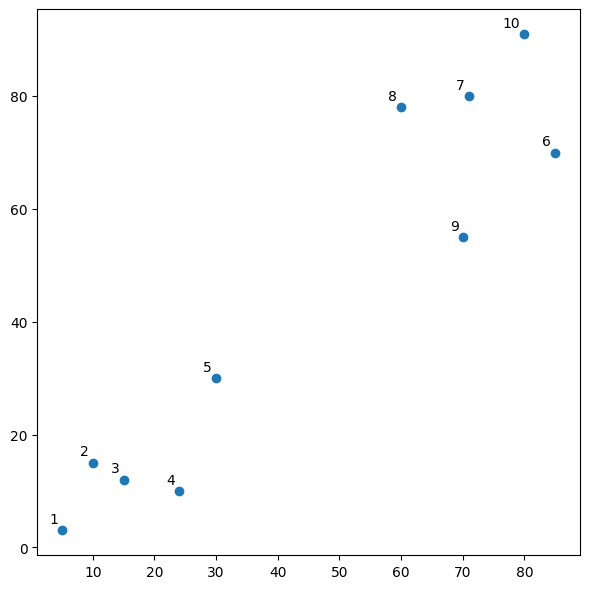

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 실습데이터 형성
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(7, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

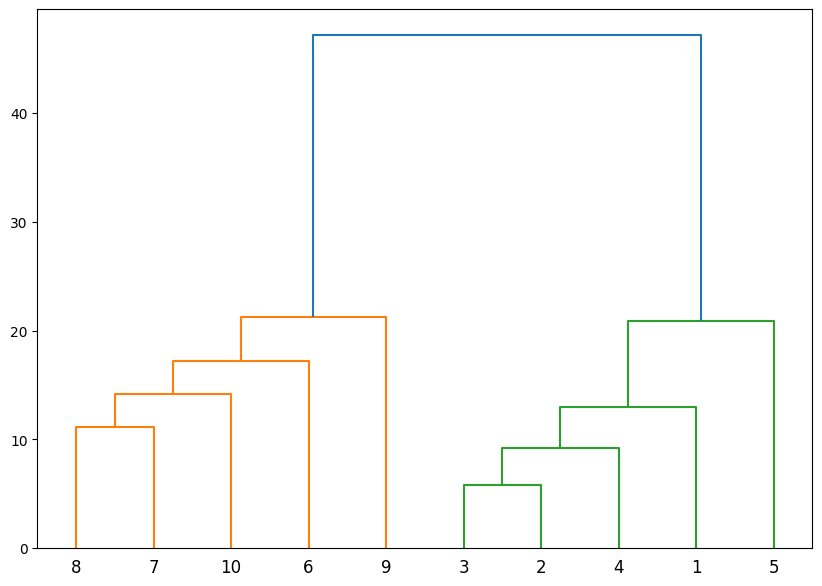

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single', metric='euclidean')
# single - 최단 연결법
# complete - 최장 연결법
# average - 평균 연결법
# centroid - 중심 연결법
# ward - 와드 연결법

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

 학습된 결과를 dendogram을 통해서 시각화하면 위와 같다. leaf node까지 표현되어 10개의 cluster를 만들수 있긴 하지만, 여기서 합당한 cluster 개수는 2로 보인다. 이는 색이 다르게 표현되는 결과를 가져온다.

## 병합군집

In [7]:
customer_data = pd.read_csv(r'C:\Users\whgur\Desktop\workspace\ADP\data\shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


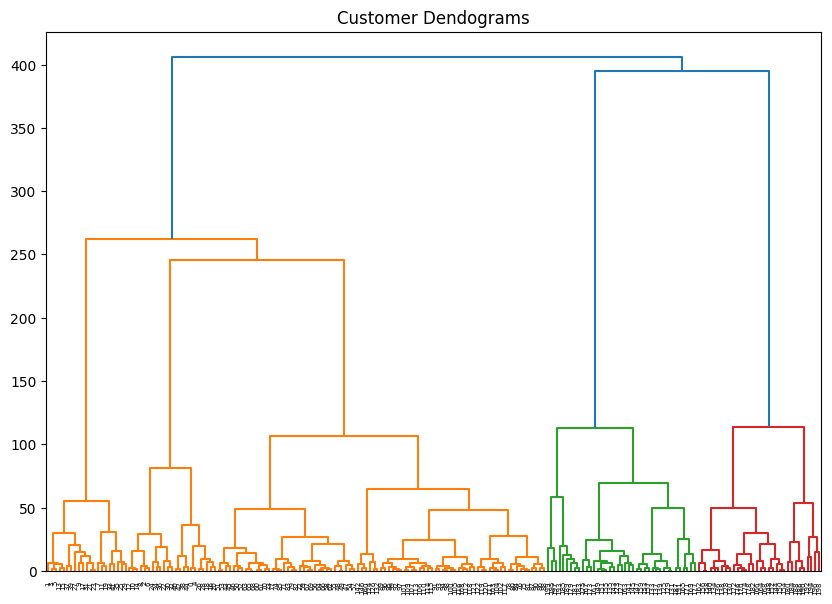

In [8]:
data = customer_data.iloc[:, 3:5].values

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

 이번에는 ward method 알고리즘을 통해서 Hierarchical Clustering을 진행하였다. 이는 거리계산방법의 차이라고 위에서 언급했다. 

 scipy를 통해 Hierarchical Clustering을 실습해보았다. sklearn에는 AgglomerativeClustering (병합군집)이라는 것이 존재한다.

 병합 군집은 계층적 군집을 만들어서 군집이 반복하여 진행되면서 모든 포인트들이 하나의 포인트를 가진 클러스터에서 마지막 클러스터까지 이동하여 최종 군집이 형성되는 것이다. 여기서 주의할 점은 병합군집(agglomerative clustering)은 군집이 한 번 형성되면 군집에 속한 개체가 다른 군집으로 이동할 수 없는 특성을 가지고있다는 점이다. 

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

 위의 결과는 군집 분석의 결과이다. sklearn같은 경우는 dendrogram을 통해서 확인하는 함수가 존재하지 않는다. 그렇기에 만약 dendrogram을 통해서 시각화를 진행하고 싶다면 scipy라이브러리를 활용하면 된다. 

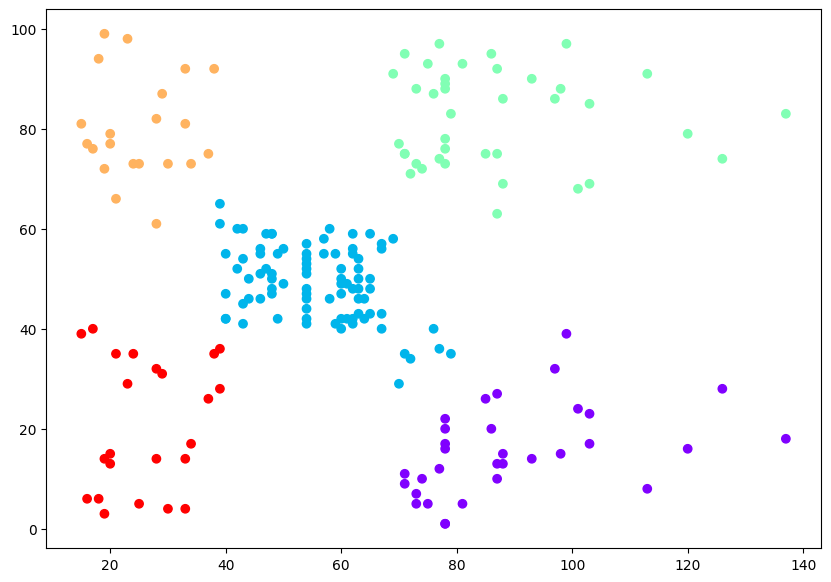

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

 군집 형성의 최종 결과를 색이 다른 scatter plot을 통해서 나타낼 수 있다. 

---

## 비계층적 군집분석

비계층적 군집분석(Non-Hierarchical Clustering)이란, 말그대로 계층을 두지않고 그룹화를 할 유사도 측정 방식에 따라 최적의 그룹(cluster)을 계속적으로 찾아나가는 방법이다.

### K-Means

K-means는 중심기반(Center-based) 클러스터링 방법으로 “유사한 데이터는 중심점(centroid)을 기반으로 분포할 것이다”는 가정을 기반으로 한다.

n개의 데이터와 k(<=n)개의 중심점(centroid)이 주어졌을때 각 그룹 내의 데이터와 중심점 간의 비용(거리)을 최소화하는 방향으로 계속 업데이트를 해줌으로써 그룹화를 수행하는 기법이다.(k-means 클러스터링은 클러스터내 오차제곱합(SSE)의 값이 최소가 되도록 클러스터의 중심을 결정해나가는 방법.)


1. 초기점(k) 설정
   * k는 중심점(centroid)이자, 묶일 그룹(cluster)의 수와 같다.
2. 그룹(cluster) 부여
   * k개의 중심점(동그라미)과 개별 데이터(네모)간의 거리를 측정한다. 가장 가까운 중심점으로 데이터를 부여한다.
3. 중심점(centroid) 업데이트
   * 할당된 데이터들의 평균값(mean)으로 새로운 중심점(centroid)을 업데이트한다.
4. 최적화
   * 2,3번 작업을 반복적으로 수행한다. 변화가 없으면 작업을 중단한다.


Python의 Scikit learn 라이브러리에서 제공하는 KMeans함수로 이를 간단하게 구현할 수 있다.

   * KMeans(n_cluster=, init=, random_state=)

함수의 파라미터는 위 3가지 정도만 알아두면 된다..

   * n_cluster : k의 수

   * init : 초기값 지정(default는 random)(배열의 수는 k와 동일해야함)

   * random_state : random 시드 설정

In [27]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns=['Sepal length','Sepal width','Petal length','Petal width']
df = df[['Sepal length','Sepal width']].copy() 

df.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


초기값 3개를 직접 지정하였고 가시적으로 확인하기 위하여 2개 변수만 사용한다.

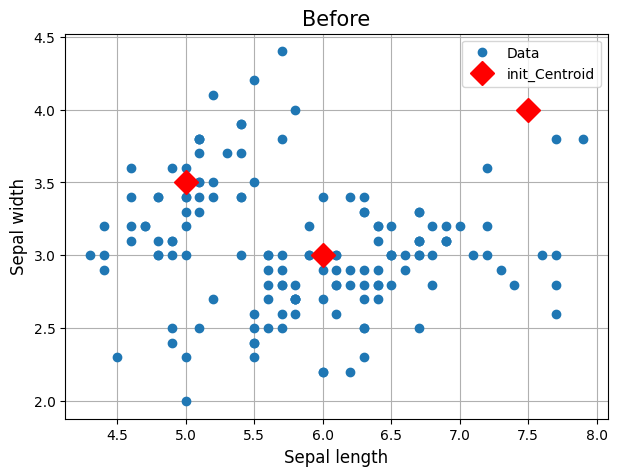

In [28]:
x1,y1 = 5, 3.5
x2,y2 = 6, 3
x3,y3 = 7.5, 4

plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df["Sepal length"], df["Sepal width"], "o", label="Data")
plt.plot([x1,x2,x3], [y1,y2,y3], "rD", markersize=12, label='init_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init=np.array([(x1,y1),(x2,y2),(x3,y3)]))
kmeans.fit(df)

df['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


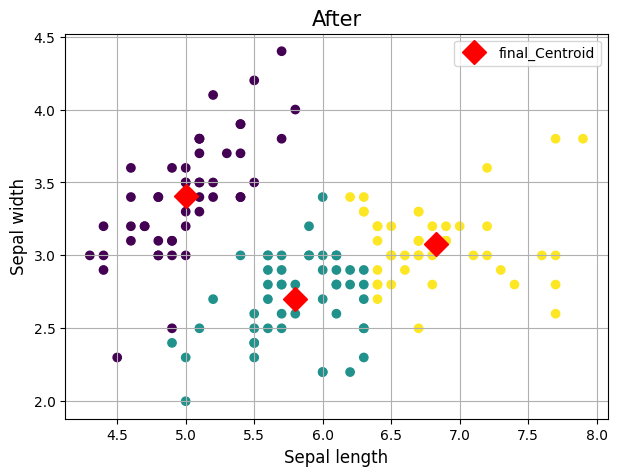

In [30]:
plt.figure(figsize=(7,5))
plt.title("After", fontsize=15)
plt.scatter(df['Sepal length'],df['Sepal width'],c=df['cluster'])
plt.plot(final_centroid[:,0], final_centroid[:,1], "rD", markersize=12, label='final_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

중심값(Centroid)이 이동하였고, 이것을 기반으로 군집화된 결과를 확인할 수 있다.

### 최적의 K 값을 구하기
https://m.blog.naver.com/samsjang/221017639342

 #### Elbow method
 
 만약 클러스터의 개수를 1로 두고 계산한 SSE 값과 클러스터의 개수를 2로 두고 계산한 SSE 값을 비교했을 때, 클러스터의 개수를 2로 두고 계산한 SSE 값이 더 작다면 1개의 클러스터보다 2개의 클러스터가 더 적합하다는 것을 짐작할 수 있다.

 이런 식으로 클러스터의 개수를 늘려나가면서 계산한 SSE를 그래프로 그렸을 때, SSE의 값이 점점 줄어들다가 어느 순간 줄어드는 비율이 급격하게 작아지는 부분이 생긴다. 그래프 모양을 보면 팔꿈치에 해당하는 바로 그 부분이 우리가 구하려는 최적의 클러스터 개수가 된다.

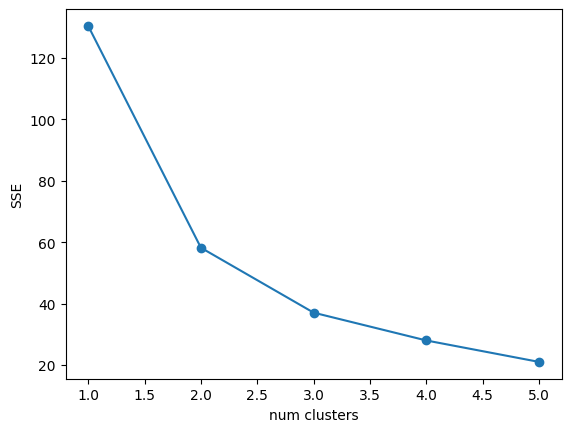

In [33]:
def elbow(x,min_k,max_k):
    sse = []

    for i in range(min_k, max_k+1):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)

    plt.plot(range(min_k, max_k+1), sse, marker='o')
    plt.xlabel('num clusters')
    plt.ylabel('SSE')
    plt.show()

elbow(df[['Sepal length','Sepal width']], 1,5)

급격하게 꺽이는 지점인 2나 3이 최적의 K라고 볼 수 있다.

#### Silhouette 계수

https://studying-haeung.tistory.com/10

각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며, 군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.

클러스터의 개수가 최적화되어있따면 실루엣 계수의 값은 1에 가까워진다.
![](image/%EC%8B%A4%EB%A3%A8%EC%97%A3.png)

a(i): 데이터 포인트 i가 속한 클러스트 내 데이터 포인트들과 거리 평균(군집 내 응집도)

b(i): 데이터 x(i)와 가장 가까운 클러스터내의 모든 데이터들과의 평균 거리(군집 간 분리도)

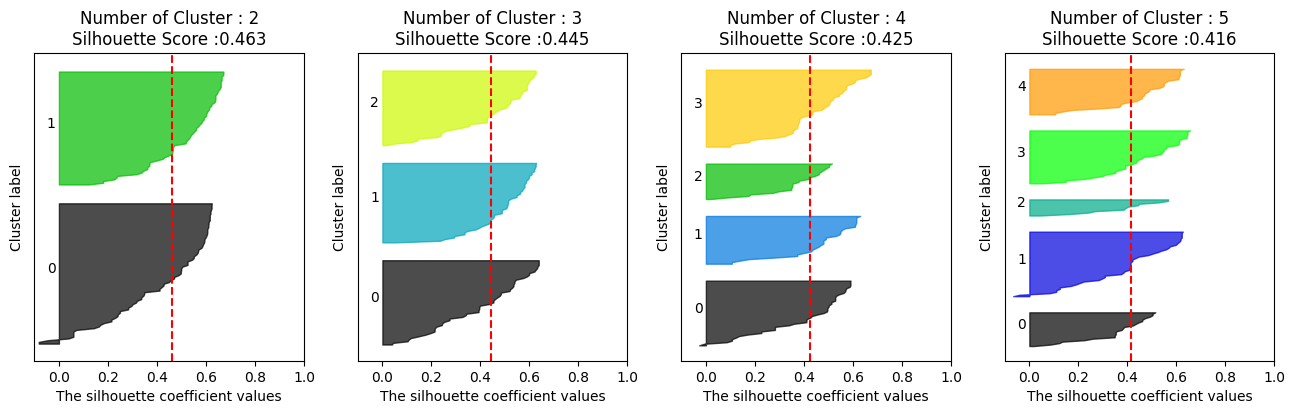

In [35]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], df[['Sepal length','Sepal width']])

실루엣 계수의 전체 평균 값이 크고, 클러스터별 실루엣 계수 평균 값이 클수록 클러스터링이 잘 되었다고 판단할 수 있다. 그래프 상에서는 클러스터 내의 데이터 포인트가 1에 가까울수록, 값이 급격히 감소하지 않을수록 좋다. 

해당 예시에서는 k가 2인 경우가 가장 좋아보인다.

### DBSCAN

DBSCAN는 밀도기반(Density-based) 클러스터링 방법으로 “유사한 데이터는 서로 근접하게 분포할 것이다”는 가정을 기반으로 한다. 

K-means와 달리 처음에 그룹의 수(k)를 설정하지 않고 자동적으로 최적의 그룹 수를 찾아나간다.
![](image/dbscan.png)

1. 먼저 하나의 점(파란색)을 중심으로 반경(eps) 내에 최소 점이 4개(minPts=4)이상 있으면, 하나의 군집으로 판단하며 해당 점(파란색)은 Core가 된다.

2. 반경 내에 점이 3개 뿐이므로 Core가 되진 않지만 Core1의 군집에 포함된 점으로, 이는 Border가 된다.

3. 1번과 마찬가지로 Core가 된다.

4. 그런데 반경내의 점중에 Core1이 포함되어 있어 군집을 연결하여 하나의 군집으로 묶인다.

이와 같은 방식으로 군집의 확산을 반복하면서, 자동으로 최적의 군집수가 도출된다.

용어를 정리해보면 다음과 같다.

* minPts : 반경 내 최소 개체(point) 수
* eps(epsilon) : 군집화할 반경
* Core : 중심점(minPts를 만족할 경우)
* Border : 경계점(minPts를 만족하진 않지만, 어느 Core 반경에 속한 경우)
* Noise : 어느 군집에도 속하지 않는 점

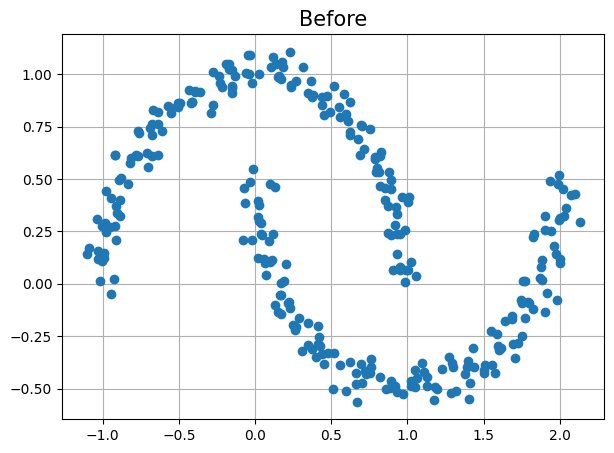

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=300, noise=0.05, random_state=42)
df=pd.DataFrame(x)

plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df[0], df[1], "o")
plt.grid()
plt.show()

In [38]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.3, min_samples=5)
db_scan.fit(df.values)
df['cluster_db'] = db_scan.labels_

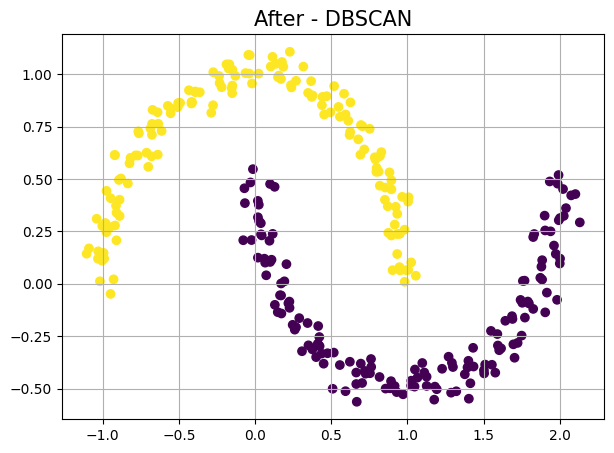

In [39]:
plt.figure(figsize=(7,5))
plt.title("After - DBSCAN", fontsize=15)
plt.scatter(df[0],df[1],c=df['cluster_db'])
plt.grid()
plt.show()

#### K-Means VS DBSACN

**K-means**

* 군집의 수(k)를 미리 결정
* 중심점(Centroid) 갱신을 통해 비용함수를 최적화
* 이상치에 영향을 많이 받음

**DBSCAN**

* 반경(eps), 최소 개체 수(minPts)를 미리 결정
* 자동적으로 군집의 수 결정
* 군집 간 개체들이 섞이지 않음(최소 반경 내에 한해서)
* 노이즈 개념으로 이상치 검출이 가능

### SOM

/R

library(NbClust)

iris2 = iris[-5]

iris3 = scale(iris2)

som_model = som(iris3, grid = somgrid(3,5,”rectangular”))

abc = data.frame(matrix(unlist(som_model$codes), nrow=15, byrow=FALSE))

km <- kmeans(abc, centers = 4)

km

### 군집분석 성능평가
1. Dunn Index

   * 분자 - 군집과 군집사이의 거리 중 최솟값

   * 분모 - 군집내에서의 데이터들의 거리 중 최댓값

   * 분자값이 크면 클수록 군집과 군집사이의 거리가 크고, 분모값이 작으면 작을 수록 군집내의 데이터들이 모여있 으므로 Dunn Index가 클 수록 군집이 잘 된것으로 볼 수 있다.

   * 클러스터 내 최대 거리에 대한 클러스터 간 최소거리의 비와 같다.

   * Dunn Index의 경우 값이 클수록 클러스터링이 잘되었다고 판단한다.

   * Sklean에 구현되어 있지 않으니,,, 성능을 구할 일이 있다면 실루엣 계수를 사용하길!



2. Shilouette

   * a(i) = 군집내 데이터와의 거리를 나타내는 척도이므로 작으면 작을수록 군집이 잘 모임.

   * b(i) = 군집과 군집사이의 거리중 최소값이므로, 위의 그림에서는 아래군집보다는 오른쪽군집과의 거리의 평균.

   * 1에 가까울수록 군집이 잘 나누어짐.  

   * 코드는 Kmeans 최적의 k값 찾기 부분 참고하기

① 군집 내 응집도 최대화란? 같은 군집 내 응집도를 최대화 하는 것으로, 같은 군집 내 객체들의 거리를 최소화하는  것이다.

② 군집 간 분리도 최대화란? 다른 군집 간 거리를 최대화하는 것이다.